# 베스트 모델 - 와인 이진분류

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from google.colab import files
up = files.upload()
filename = list(up.keys())[0]

Saving wine.csv to wine.csv


In [3]:
df = pd.read_csv(filename, header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


In [4]:
np.unique(df.values[:,-1], return_counts=True) # 0 = 화이트와인, 1 = 레드와인

(array([0., 1.]), array([4898, 1599]))

In [5]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df.values[:,:-1])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df.values[:,-1], stratify=df.values[:,-1], random_state=seed
)

## 모델 정의/설정

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential([
    Dense(30, input_dim=12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)

## 모델 저장관련 설정

In [10]:
import os
if not os.path.exists('model'):
    os.mkdir('model')

In [11]:
# model_path = 'model/best_wine.h5' <-- 쓸 때마다 overwritting. 실제론 이렇게 쓰는게 맞음
model_path = 'model/wine_{epoch:03d}_{val_loss:.4f}.h5'

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    model_path, monitor='val_loss', verbose=1, save_best_only=True
)

## 모델 학습 및 저장

In [13]:
hist = model.fit(
    X_train, y_train, validation_split=0.2,
    epochs=200, batch_size=200, verbose=0,
    callbacks=[checkpoint]
)


Epoch 00001: val_loss improved from inf to 0.57130, saving model to model/wine_001_0.5713.h5

Epoch 00002: val_loss improved from 0.57130 to 0.47085, saving model to model/wine_002_0.4708.h5

Epoch 00003: val_loss improved from 0.47085 to 0.36882, saving model to model/wine_003_0.3688.h5

Epoch 00004: val_loss improved from 0.36882 to 0.28201, saving model to model/wine_004_0.2820.h5

Epoch 00005: val_loss improved from 0.28201 to 0.21210, saving model to model/wine_005_0.2121.h5

Epoch 00006: val_loss improved from 0.21210 to 0.15115, saving model to model/wine_006_0.1511.h5

Epoch 00007: val_loss improved from 0.15115 to 0.09823, saving model to model/wine_007_0.0982.h5

Epoch 00008: val_loss improved from 0.09823 to 0.06449, saving model to model/wine_008_0.0645.h5

Epoch 00009: val_loss improved from 0.06449 to 0.04949, saving model to model/wine_009_0.0495.h5

Epoch 00010: val_loss improved from 0.04949 to 0.04190, saving model to model/wine_010_0.0419.h5

Epoch 00011: val_loss i

## 평가 - 베스트 모델

In [18]:
from tensorflow.keras.models import load_model
best_model_path=load_model('model/wine_063_0.0218.h5')
best_model=load_model(best_model_path)
best_model.evaluate(X_test, y_test)

TypeError: ignored

## 학습과정 시각화

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

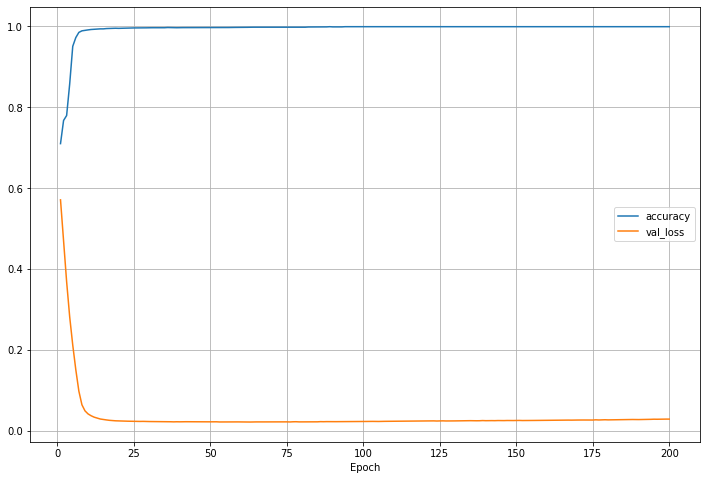

In [23]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=2, label='accuracy')
plt.plot(xs, y_vloss, ms=2, label='val_loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()